In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report



In [4]:
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Dropout
from keras.utils import to_categorical

In [6]:
from keras.datasets import fashion_mnist

In [8]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 22s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 4s 1us/step


In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_test.shape

(10000, 28, 28)

In [12]:
y_train.shape

(60000,)

In [13]:
y_test.shape

(10000,)

In [ ]:
0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot

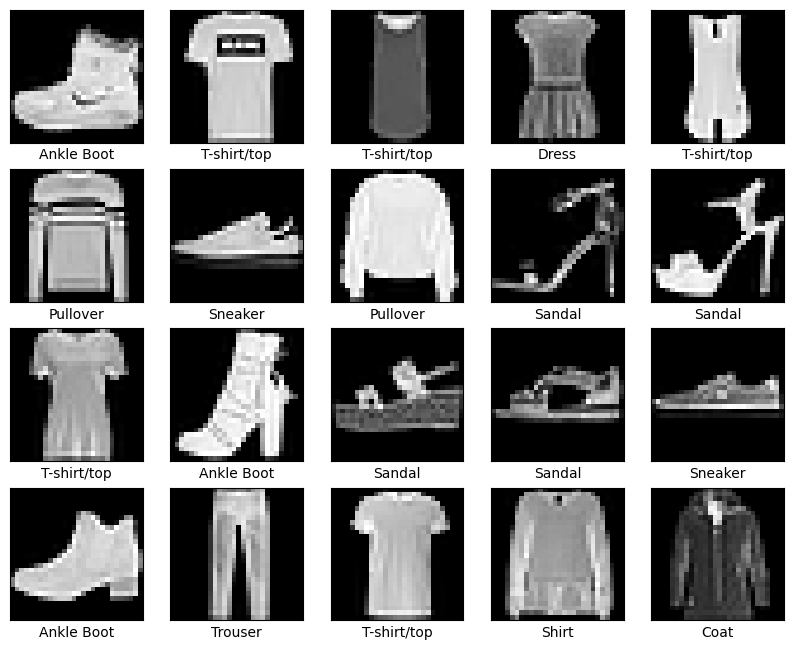

In [19]:
col_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
plt.figure(figsize=(10,10))
for i in range (20):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(col_names[y_train[i]])
plt.show()

    

In [20]:
x_train_2d=x_train.reshape(60000,784)
x_test_2d=x_test.reshape(10000,784)

y_train_cc=to_categorical(y_train,num_classes=10)
y_test_cc=to_categorical(y_test,num_classes=10)

In [36]:
model=Sequential([layers.Dense(256,activation='relu',input_shape=(784,)),
                  layers.Dropout(0.3),layers.BatchNormalization(),
                 layers.Dense(64,activation='relu'),
                layers.Dropout(0.3),layers.BatchNormalization(),
                layers.Dense(64,activation='relu'),
                layers.Dropout(0.3),layers.BatchNormalization(),
                 layers.Dense(10,activation='sigmoid')])

In [37]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy','mse'])

In [38]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 223,754 (874.04 KB)

 Trainable params: 222,986 (871.04 KB)

 Non-trainable params: 768 (3.00 KB)

In [39]:
history=model.fit(x_train_2d,y_train_cc,batch_size=100,epochs=10,validation_data=[x_test_2d,y_test_cc])

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7417 - loss: 0.7501 - mse: 0.2288 - val_accuracy: 0.8344 - val_loss: 0.4555 - val_mse: 0.1987
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8150 - loss: 0.5338 - mse: 0.2334 - val_accuracy: 0.8405 - val_loss: 0.4359 - val_mse: 0.2118
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8286 - loss: 0.4963 - mse: 0.2406 - val_accuracy: 0.8452 - val_loss: 0.4341 - val_mse: 0.2223
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8369 - loss: 0.4665 - mse: 0.2458 - val_accuracy: 0.8552 - val_loss: 0.4232 - val_mse: 0.2294
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8436 - loss: 0.4517 - mse: 0.2492 - val_accuracy: 0.8598 - val_loss: 0.4329 - val_mse: 0.2350
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8466 - loss: 0.4378 - mse: 0.2529 - val_accuracy: 0.8526 - val_loss: 0.4249 - val_mse: 0.2380
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 

In [48]:
pred=model.predict(x_test_2d)
y_pred=np.argmax(pred,axis=1)
cm=confusion_matrix(y_test,y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [57]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [58]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [62]:
print(y_test.shape)
print(y_pred.shape)

(10000,)
(10000,)


Text(0.5, 1.0, 'Confusion Matrix')

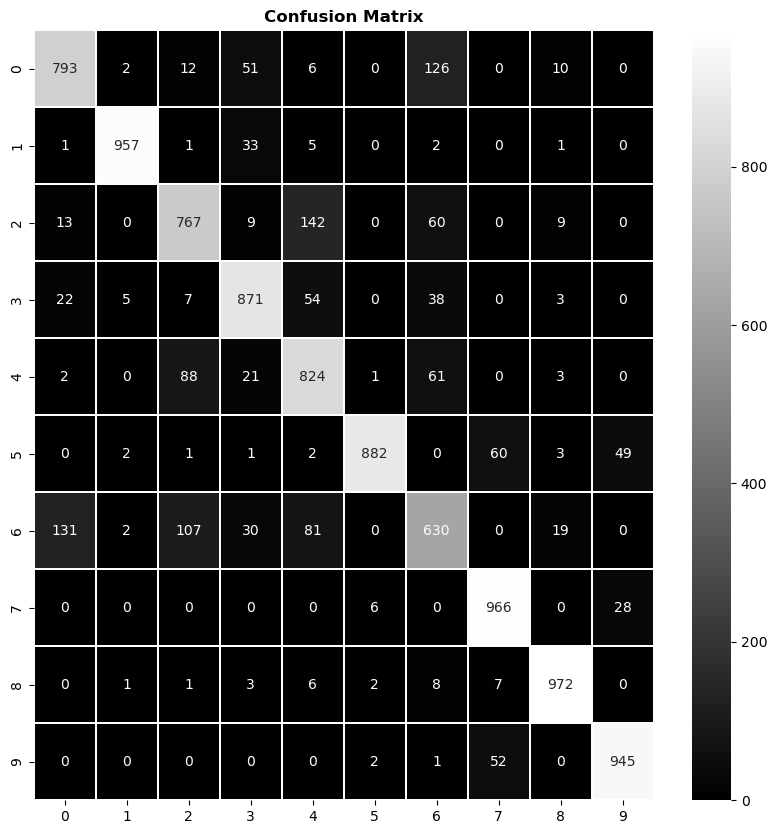

In [56]:
plt.figure(figsize=(10,10))
plt.style.use('seaborn-v0_8-deep')
sns.heatmap(cm,annot=True,fmt='d',cmap='gray',linewidth=0.3)
plt.title("Confusion Matrix",fontweight='bold')

Text(0.5, 1.0, 'Accuracy')

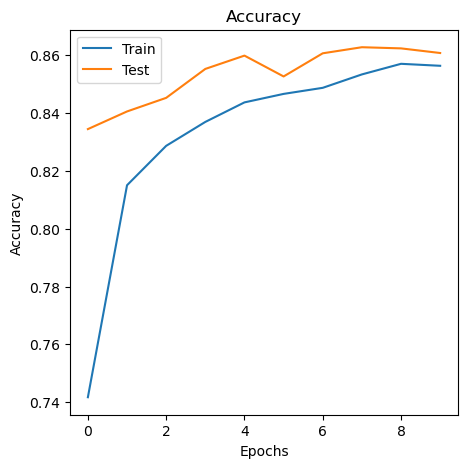

In [43]:
plt.figure(figsize=(5,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train','Test'],loc='best')
plt.title('Accuracy')

Text(0.5, 1.0, 'Loss')

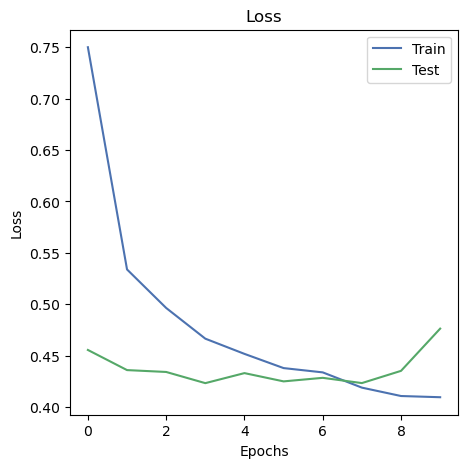

In [63]:
plt.figure(figsize=(5,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train','Test'],loc='best')
plt.title('Loss')

Text(0.5, 1.0, 'MSE')

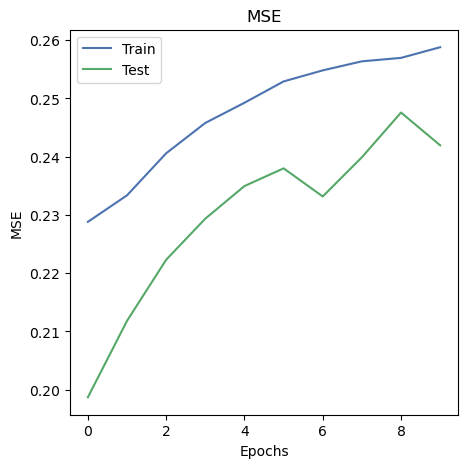

In [64]:
plt.figure(figsize=(5,5))
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend(['Train','Test'],loc='best')
plt.title('MSE')

In [85]:
single_pred=model.predict(x_test_2d[[10]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [66]:
y_test[2]

1

In [86]:
col_names[y_test[10]]

'Coat'

In [87]:
a=np.argmax(single_pred,axis=1)
a

array([4], dtype=int64)

In [88]:
col_names[a.item()]

'Coat'

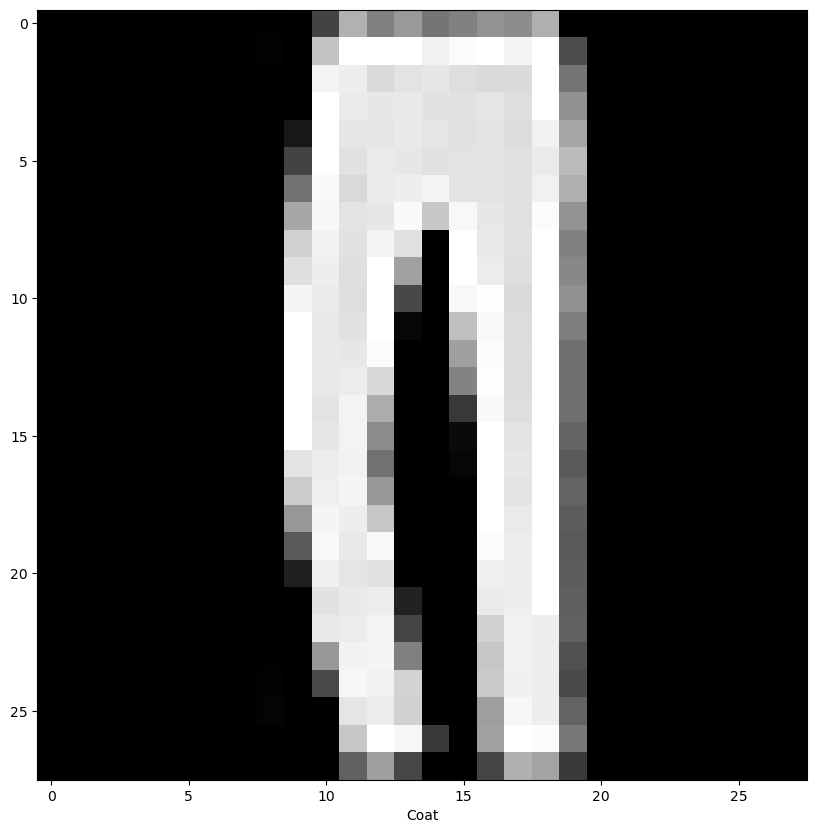

Actual Name of the Image:Coat


In [90]:
plt.figure(figsize=(10,10))
plt.imshow(x_test_2d[2].reshape(28,28),cmap='gray')
plt.xlabel(col_names[a.item()])
plt.show()
print("Actual Name of the Image:{}".format(col_names[y_test[10]]))